In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
from fetch_request import download

In [2]:
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv"
await download(path, "cell_samples.csv")

In [3]:
df = pd.read_csv("data/cell_samples.csv")
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


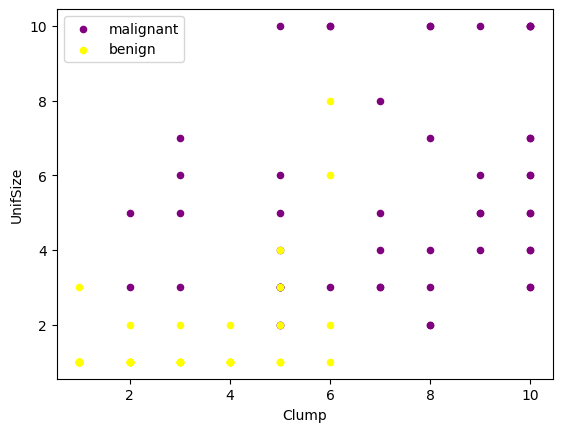

In [6]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Purple', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [7]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
cdf = df.drop(['ID', 'Class'], axis=1)
X = np.asarray(cdf)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [13]:
df['class'] = df['Class'].astype('int')
y = np.asarray(df['class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')

Train set: (546, 9), (546,)
Test set: (137, 9), (137,)


### Modelin with Sci-kit
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

In [17]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)
y_hat [0:5]

array([4, 2, 4, 2, 2])

              precision    recall  f1-score   support

           2       0.98      0.99      0.98        84
           4       0.98      0.96      0.97        53

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

[[83  1]
 [ 2 51]]


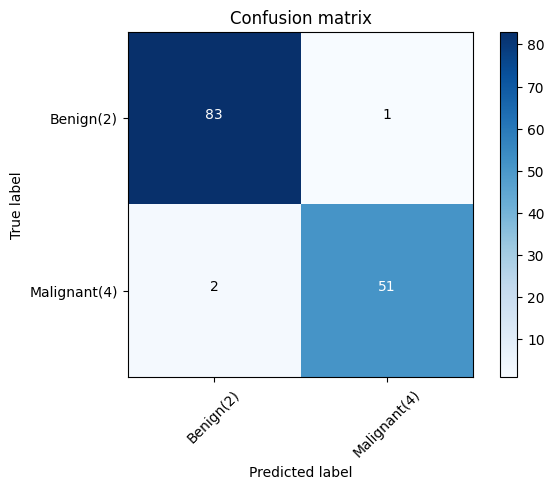

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from plot_cnf_matrix import plot_confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_hat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'], normalize= False,  title='Confusion matrix')

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, y_hat, average='weighted')

0.9780627009150309

In [22]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_hat, pos_label=2)

0.9651162790697675

In [24]:
clf_2 = svm.SVC(kernel='linear')
clf_2.fit(X_train, y_train)
y_hat_2 = clf_2.predict(X_test)
print(f1_score(y_test, y_hat_2, average='weighted'))
print(jaccard_score(y_test, y_hat_2, pos_label=2))

0.9780627009150309
0.9651162790697675
